# Dataset

In [1]:
import pandas as pd

dataset_df = pd.read_csv('data/csv/All.csv', encoding='utf-8', dtype=str, low_memory=False)

In [2]:
dataset_df

,PTTp,PTTf,PTTd,HeartRate,SBP,DBP,AI,LASI,S1,S2,...,peak_to_peak_time,asymmetry_ratio,harmonic_ratio_2nd,harmonic_ratio_3rd,ptt_peak_enhanced,ptt_foot_enhanced,pat_slope,ptt_variability,ppg_spectral_entropy,ecg_spectral_entropy
0,0.0883809523809524,0.44000000000000006,2.6733333333333333,125.12695097297141,130.43329604900043,64.68913169835835,0.9922470519252067,2.392,11.784402737047898,4.340562267839687,...,0.4666666666666666,0.8040022713177757,0.14301352213544963,0.007591979534406322,0.08952380952380953,0.4272,0.030857142857142864,0.010653052536464428,1.3979904721514882,2.698248495368292
1,0.07000000000000002,0.41515789473684217,1.672,123.96177910670554,157.72738151641408,64.38629825186952,0.9177047289504034,3.84,6.033327859237537,7.44174467253177,...,0.4389090909090909,0.7783734207662544,0.16611602493808017,0.015676812662872748,0.08320000000000002,0.40840000000000004,0.1924,0.04370080090799252,1.848372175783613,2.8680105004627436
2,0.07847619047619048,0.44320000000000004,0.504,121.96242854624663,140.10442869493437,50.98347603952466,0.989021633839199,1.48,3.8016195503421315,2.742877028347996,...,0.47428571428571425,1.15724275040526,0.16548260559862993,0.010942774906314009,0.07961904761904763,0.4304,0.0908,0.014910770126309278,1.488561992228541,2.731385465813657
3,0.05676190476190477,0.3928000000000001,3.544,129.59047971954195,138.06274513634833,55.58459066198415,0.9848300582474556,0.48,13.149560899315741,0.9034979472140763,...,0.44145454545454554,0.7633618971229377,0.2016681716303435,0.01275581670595448,0.06080000000000001,0.39360000000000006,0.27080000000000004,0.004664761515876239,1.6638032661324857,2.851497023979312
4,0.0712,0.4374736842105264,3.2440000000000007,121.84646571478936,132.6019742786947,55.93626821274539,0.9975117862755369,1.488,6.727907722385142,2.710827761485826,...,0.48039999999999994,0.7788374846388108,0.1692350840313054,0.01075733949843127,0.072,0.41600000000000004,0.17559999999999998,0.014532721699667957,1.4336183228385946,2.615495932515342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4940,0.5011428571428571,0.3822857142857144,2.518857142857143,90.13468008419939,168.8285046099021,97.14496720610043,0.9449321628092577,4.008,8.27980136852395,7.3020715542522,...,0.5177777777777779,0.8810828474878966,0.17322019201642547,0.012826658430954615,0.408,0.40853333333333347,0.1898666666666667,0.0,1.662235697925618,3.3381073201776372
4941,0.3381333333333334,0.2661333333333333,4.872571428571429,90.51399808433051,138.18569728798263,78.64674610664025,0.894874694922317,0.504,16.8972715542522,1.0228183773216033,...,0.36953846153846154,1.1478687706108859,0.13306029210963277,0.012172322528238107,0.3333333333333333,0.34800000000000003,0.15253333333333333,0.09913402824235258,1.6927675961003348,3.4080503416388948
4942,0.5068571428571428,0.41599999999999987,1.0426666666666666,90.51821592016374,178.1948408953702,78.07234000152394,0.9983107051241943,2.824,6.2422357771260994,4.815519843597263,...,0.5750588235294117,0.7496781137323001,0.09557159401572615,0.007618501758909123,0.15733333333333333,0.44,0.1657142857142857,0.18293411078551994,1.7632569935687599,3.42823776221205
4943,0.29947826086956525,0.20973913043478265,3.3327999999999998,155.74575797668763,113.00553565632205,56.17062845987654,0.997623177233892,7.712,3.030912218963832,15.89653567937439,...,0.40486956521739126,1.0383570489818539,0.3076105272386495,0.02344407720082784,0.2891428571428572,0.184,0.14833333333333332,0.08481817286984901,1.9592650650168228,3.088085868826993


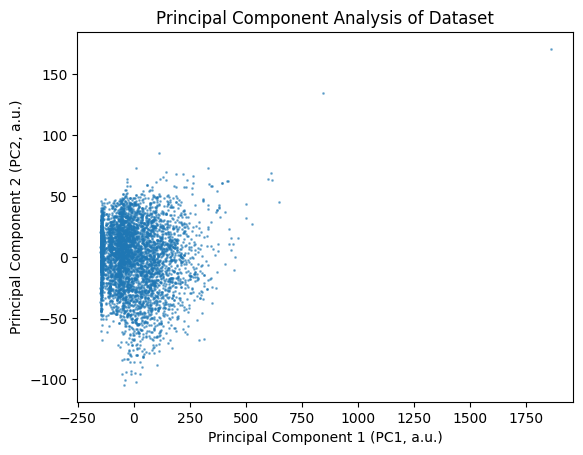

In [3]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as PCA_sklearn

dataset_initial_PCA = PCA_sklearn(n_components=2)
PC1, PC2 = dataset_initial_PCA.fit_transform(dataset_df).T

plt.scatter(PC1, PC2, s=1, alpha=0.5)
plt.xlabel('Principal Component 1 (PC1, a.u.)')
plt.ylabel('Principal Component 2 (PC2, a.u.)')
plt.title('Principal Component Analysis of Dataset')
plt.savefig('figures/PCA_initial.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [4]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

dbp = dataset_df[['DBP']].astype(np.float32)
sbp = dataset_df[['SBP']].astype(np.float32)
X = dataset_df.drop(columns=['DBP', 'SBP', 'pulse_pressure', 'map_pressure', 'dp_dt_max']).astype(np.float32)

X_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(X)

sbp_scaler = StandardScaler()
sbp_scaled = pd.DataFrame(sbp_scaler.fit_transform(sbp))

dbp_scaler = StandardScaler()
dbp_scaled = pd.DataFrame(dbp_scaler.fit_transform(dbp))

dbp = dbp['DBP']
sbp = sbp['SBP']

K_FOLDS = 5
kf = KFold(n_splits=K_FOLDS, shuffle=True, random_state=42)

In [5]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def evaluate_regression(y_true, y_pred, label="Model", plot=True):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)

    results_df = pd.DataFrame({
        'Model': [label],
        'R^2': [r2],
        'MSE': [mse],
        'RMSE': [rmse],
        'MAE': [mae]
    })
    print(results_df)

    if plot:
        plt.figure(figsize=(5, 5))
        plt.scatter(y_true, y_pred, alpha=0.5, label=label)
        min_val = min(y_true.min(), y_pred.min())
        max_val = max(y_true.max(), y_pred.max())
        plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')
        plt.xlabel("True Values")
        plt.ylabel("Predicted Values")
        plt.title(f"{label} for Calibration Curve")
        plt.legend()
        plt.show()

        errors = y_true - y_pred
        plt.figure(figsize=(6, 5))
        plt.hist(errors, bins=min(round(max(errors) - min(errors)), 40), edgecolor='black', alpha=0.7)
        plt.xlabel("Error (True - Predicted)")
        plt.ylabel("Frequency")
        plt.title(f"Error Distribution for {label}")
        plt.show()
    return r2, mse, rmse, mae

# Evaluation against Measurement Standards

In [6]:
import numpy as np

def evaluate_bhs(differences_mmHg):
    differences_mmHg = np.abs(differences_mmHg)
    n = len(differences_mmHg)
    pct_5 = np.sum(differences_mmHg <= 5) / n * 100
    pct_10 = np.sum(differences_mmHg <= 10) / n * 100
    pct_15 = np.sum(differences_mmHg <= 15) / n * 100

    # Assign grade
    if pct_5 >= 60 and pct_10 >= 85 and pct_15 >= 95:
        grade = 'A'
    elif pct_5 >= 50 and pct_10 >= 75 and pct_15 >= 90:
        grade = 'B'
    elif pct_5 >= 40 and pct_10 >= 65 and pct_15 >= 85:
        grade = 'C'
    else:
        grade = 'D'

    return {
        'grade': grade,
        'percent_within_5mmHg': pct_5,
        'percent_within_10mmHg': pct_10,
        'percent_within_15mmHg': pct_15
    }

def evaluate_aami(differences_mmHg):
    differences_mmHg = np.array(differences_mmHg)
    mean_error = np.mean(differences_mmHg)
    std_dev = np.std(differences_mmHg, ddof=1)  # Sample std dev

    pass_fail = 'Pass' if abs(mean_error) <= 5 and std_dev <= 8 else 'Fail'

    return {
        'pass_fail': pass_fail,
        'mean_error_mmHg': mean_error,
        'std_dev_mmHg': std_dev
    }


# K-Fold Cross Validation Setup
All models below are evaluated using k-fold cross validation (k=5).

In [7]:
def train_and_evaluate_model(model_cls, X_train, X_test, y_train, y_test, model_kwargs=None, scale_y=False, y_scaler=None):
    model = model_cls(**(model_kwargs or {}))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    if scale_y and y_scaler is not None:
        # Inverse transform predictions for reporting
        y_pred = y_scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
        y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    return y_test, y_pred

def print_cross_val_results(label, metrics, bhs_results, aami_results):
    metrics = np.array(metrics)
    print(f"\n{label} Mean ± Std over {K_FOLDS} folds:")
    print(f"R^2: {metrics[:,0].mean():.4f} ± {metrics[:,0].std():.4f}")
    print(f"MSE: {metrics[:,1].mean():.4f} ± {metrics[:,1].std():.4f}")
    print(f"RMSE: {metrics[:,2].mean():.4f} ± {metrics[:,2].std():.4f}")
    print(f"MAE: {metrics[:,3].mean():.4f} ± {metrics[:,3].std():.4f}")
    
    # Aggregate BHS results
    avg_bhs = {
        'grade': max(set([res['grade'] for res in bhs_results]), key=[res['grade'] for res in bhs_results].count),
        'percent_within_5mmHg': np.mean([res['percent_within_5mmHg'] for res in bhs_results]),
        'percent_within_10mmHg': np.mean([res['percent_within_10mmHg'] for res in bhs_results]),
        'percent_within_15mmHg': np.mean([res['percent_within_15mmHg'] for res in bhs_results])
    }
    print(f"\n{label} BHS Evaluation (Mean over {K_FOLDS} folds):")
    print(f"Grade: {avg_bhs['grade']}")
    print(f"Percent within 5 mmHg: {avg_bhs['percent_within_5mmHg']:.3e}%")
    print(f"Percent within 10 mmHg: {avg_bhs['percent_within_10mmHg']:.3e}%")
    print(f"Percent within 15 mmHg: {avg_bhs['percent_within_15mmHg']:.3e}%")
    
    # Aggregate AAMI results
    avg_aami = {
        'mean_error_mmHg': np.mean([res['mean_error_mmHg'] for res in aami_results]),
        'std_dev_mmHg': np.mean([res['std_dev_mmHg'] for res in aami_results]),
        'pass_fail': 'Pass' if all(res['pass_fail'] == 'Pass' for res in aami_results) else 'Fail'
    }
    print(f"\n{label} AAMI Evaluation (Mean over {K_FOLDS} folds):")
    print(f"Mean Error (mmHg): {avg_aami['mean_error_mmHg']:.3e}")
    print(f"Standard Deviation (mmHg): {avg_aami['std_dev_mmHg']:.2f}")
    print(f"Pass/Fail: {avg_aami['pass_fail']}")

def cross_val_regression(model_cls, X, y, label, model_kwargs=None, scale_X=False, scale_y=False, y_scaler=None, plot=True):
    metrics = []
    bhs_results = []
    aami_results = []
    for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
        if scale_X:
            X_scaler = StandardScaler()
            X_train = X_scaler.fit_transform(X[train_idx])
            X_test = X_scaler.transform(X[test_idx])
        else:
            X_train = X[train_idx]
            X_test = X[test_idx]
        if scale_y and y_scaler is not None:
            y_train = y_scaler.fit_transform(y[train_idx].reshape(-1, 1)).flatten()
            y_test = y_scaler.transform(y[test_idx].reshape(-1, 1)).flatten()
        else:
            y_train = y[train_idx]
            y_test = y[test_idx]
        
        y_test, y_pred = train_and_evaluate_model(
            model_cls, X_train, X_test, y_train, y_test, model_kwargs, scale_y, y_scaler
        )
        
        # Only plot for the first fold
        r2, mse, rmse, mae = evaluate_regression(y_test, y_pred, label=f"{label} (Fold {fold+1})", plot=(plot and fold==0))
        metrics.append([r2, mse, rmse, mae])
        
        # Evaluate against standards
        differences = y_test - y_pred
        bhs_results.append(evaluate_bhs(differences))
        aami_results.append(evaluate_aami(differences))
    
    print_cross_val_results(label, metrics, bhs_results, aami_results)

# Testing Various Models

In [8]:
MODELS_TO_TEST = {
    "LinearRegression": True,
    "RandomForestRegressor": True,
    "XGBRegressor": True,
    "SupportVectorRegressor": True,
    "CatBoostRegressor": True,
    "MultilayerPerceptronRegressor": True,
    "MultilayerPerceptronScaledRegressor": True,
}

## Linear Regression

                            Model       R^2        MSE      RMSE       MAE
0  Linear Regression DBP (Fold 1)  0.028383  50.193233  7.084718  5.511953


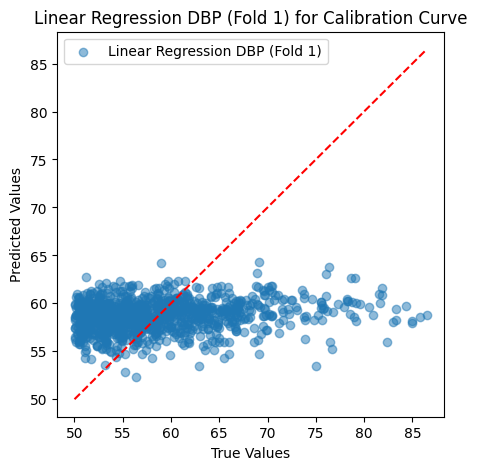

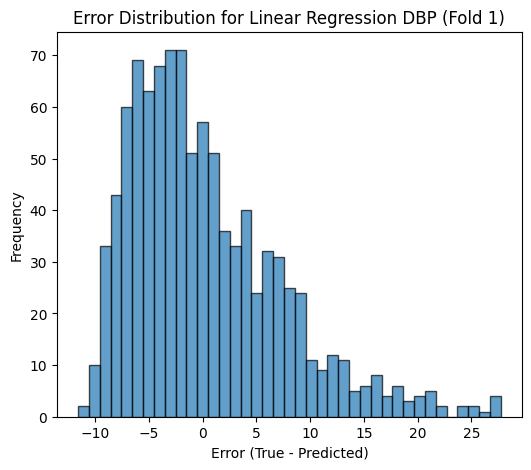

                            Model       R^2        MSE      RMSE       MAE
0  Linear Regression DBP (Fold 2)  0.035412  55.340008  7.439086  5.817021
                            Model       R^2        MSE     RMSE       MAE
0  Linear Regression DBP (Fold 3)  0.014271  51.704586  7.19059  5.665881
                            Model       R^2       MSE      RMSE       MAE
0  Linear Regression DBP (Fold 4)  0.042809  55.44487  7.446131  5.588233
                            Model       R^2        MSE      RMSE      MAE
0  Linear Regression DBP (Fold 5)  0.044863  52.130081  7.220117  5.62559

Linear Regression DBP Mean ± Std over 5 folds:
R^2: 0.0331 ± 0.0111
MSE: 52.9626 ± 2.0861
RMSE: 7.2761 ± 0.1432
MAE: 5.6417 ± 0.1013

Linear Regression DBP BHS Evaluation (Mean over 5 folds):
Grade: B
Percent within 5 mmHg: 5.120e+01%
Percent within 10 mmHg: 8.892e+01%
Percent within 15 mmHg: 9.531e+01%

Linear Regression DBP AAMI Evaluation (Mean over 5 folds):
Mean Error (mmHg): -1.256e-03
Standard D

In [9]:
from sklearn.linear_model import LinearRegression

if MODELS_TO_TEST["LinearRegression"]:
    # DBP
    cross_val_regression(LinearRegression, X.values, dbp.values, label="Linear Regression DBP", plot=True)

                            Model       R^2         MSE       RMSE        MAE
0  Linear Regression SBP (Fold 1)  0.042357  347.682831  18.646255  15.152243


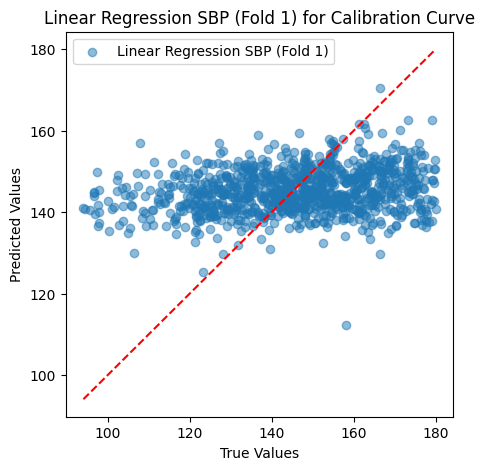

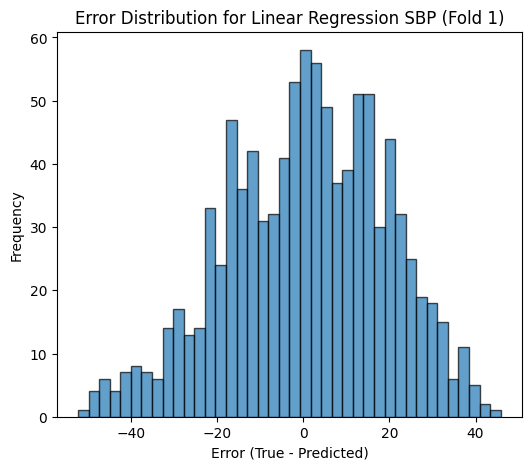

                            Model       R^2         MSE       RMSE        MAE
0  Linear Regression SBP (Fold 2)  0.096945  322.364502  17.954512  14.876471
                            Model       R^2         MSE       RMSE        MAE
0  Linear Regression SBP (Fold 3)  0.085087  346.961639  18.626905  15.212764
                            Model      R^2         MSE     RMSE        MAE
0  Linear Regression SBP (Fold 4)  0.04902  341.587982  18.4821  15.085535
                            Model       R^2         MSE       RMSE        MAE
0  Linear Regression SBP (Fold 5)  0.043216  348.547485  18.669426  15.147147

Linear Regression SBP Mean ± Std over 5 folds:
R^2: 0.0633 ± 0.0230
MSE: 341.4289 ± 9.8374
RMSE: 18.4758 ± 0.2688
MAE: 15.0948 ± 0.1164

Linear Regression SBP BHS Evaluation (Mean over 5 folds):
Grade: D
Percent within 5 mmHg: 1.978e+01%
Percent within 10 mmHg: 3.794e+01%
Percent within 15 mmHg: 5.464e+01%

Linear Regression SBP AAMI Evaluation (Mean over 5 folds):
Mean Error (m

In [10]:
if MODELS_TO_TEST["LinearRegression"]:
    # SBP
    cross_val_regression(LinearRegression, X.values, sbp.values, label="Linear Regression SBP", plot=True)

## Random Forest Regressor

                        Model       R^2        MSE      RMSE       MAE
0  Random Forest DBP (Fold 1)  0.045534  49.307247  7.021912  5.437165


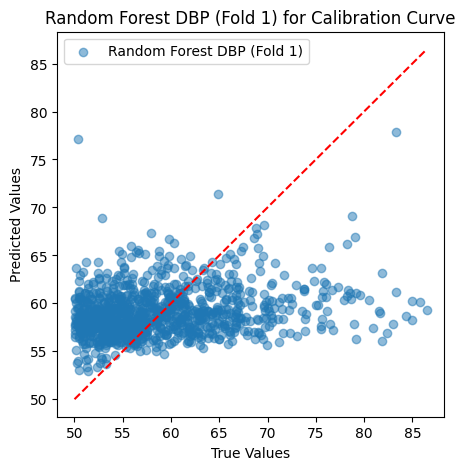

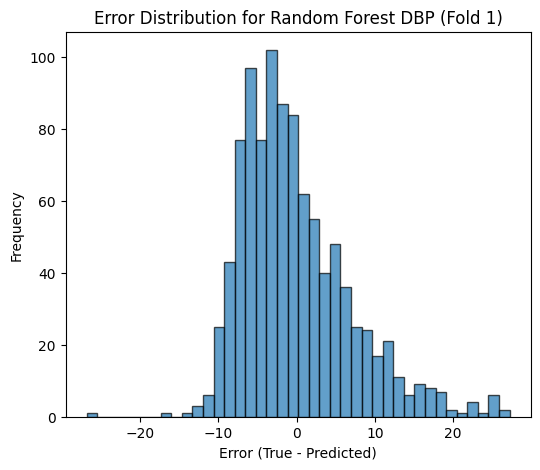

                        Model       R^2        MSE      RMSE       MAE
0  Random Forest DBP (Fold 2)  0.125613  50.164996  7.082725  5.529733
                        Model       R^2        MSE      RMSE       MAE
0  Random Forest DBP (Fold 3)  0.069487  48.808319  6.986295  5.499443
                        Model       R^2        MSE      RMSE       MAE
0  Random Forest DBP (Fold 4)  0.103512  51.928645  7.206153  5.463676
                        Model       R^2        MSE      RMSE       MAE
0  Random Forest DBP (Fold 5)  0.115123  48.295371  6.949487  5.458588

Random Forest DBP Mean ± Std over 5 folds:
R^2: 0.0919 ± 0.0299
MSE: 49.7009 ± 1.2732
RMSE: 7.0493 ± 0.0899
MAE: 5.4777 ± 0.0328

Random Forest DBP BHS Evaluation (Mean over 5 folds):
Grade: B
Percent within 5 mmHg: 5.316e+01%
Percent within 10 mmHg: 8.874e+01%
Percent within 15 mmHg: 9.592e+01%

Random Forest DBP AAMI Evaluation (Mean over 5 folds):
Mean Error (mmHg): -3.052e-01
Standard Deviation (mmHg): 7.04
Pass/Fail: Pass


In [11]:
from sklearn.ensemble import RandomForestRegressor

if MODELS_TO_TEST["RandomForestRegressor"]:
    # DBP
    cross_val_regression(RandomForestRegressor, X.values, dbp.values, label="Random Forest DBP", model_kwargs={'n_estimators':100, 'random_state':42})

                        Model      R^2         MSE       RMSE        MAE
0  Random Forest SBP (Fold 1)  0.26364  267.343468  16.350641  12.813539


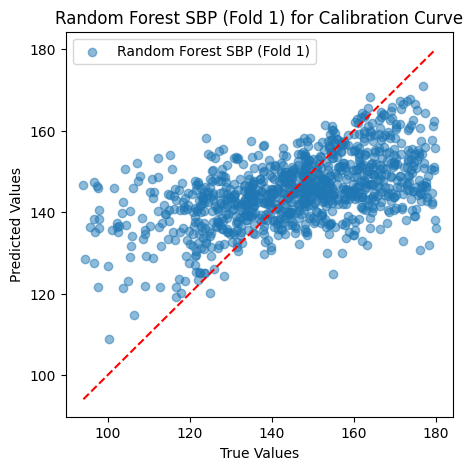

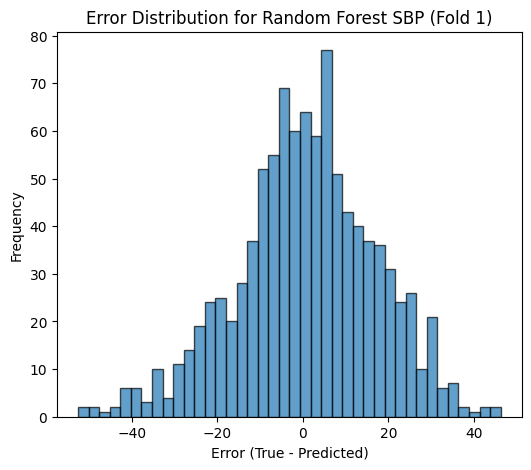

                        Model       R^2         MSE       RMSE        MAE
0  Random Forest SBP (Fold 2)  0.264315  262.618364  16.205504  12.735571
                        Model       R^2         MSE       RMSE       MAE
0  Random Forest SBP (Fold 3)  0.289798  269.329391  16.411258  12.75679
                        Model      R^2         MSE       RMSE        MAE
0  Random Forest SBP (Fold 4)  0.25859  266.311478  16.319053  12.631356
                        Model       R^2         MSE       RMSE        MAE
0  Random Forest SBP (Fold 5)  0.262055  268.826684  16.395935  12.718006

Random Forest SBP Mean ± Std over 5 folds:
R^2: 0.2677 ± 0.0112
MSE: 266.8859 ± 2.3870
RMSE: 16.3365 ± 0.0732
MAE: 12.7311 ± 0.0593

Random Forest SBP BHS Evaluation (Mean over 5 folds):
Grade: D
Percent within 5 mmHg: 2.797e+01%
Percent within 10 mmHg: 4.930e+01%
Percent within 15 mmHg: 6.534e+01%

Random Forest SBP AAMI Evaluation (Mean over 5 folds):
Mean Error (mmHg): 1.446e-01
Standard Deviation (mmHg):

In [12]:
if MODELS_TO_TEST["RandomForestRegressor"]:
    # SBP
    cross_val_regression(RandomForestRegressor, X.values, sbp.values, label="Random Forest SBP", model_kwargs={'n_estimators':100, 'random_state':42})

## XGBoost Regressor

                  Model      R^2        MSE      RMSE       MAE
0  XGBoost DBP (Fold 1) -0.06528  55.031826  7.418344  5.700426


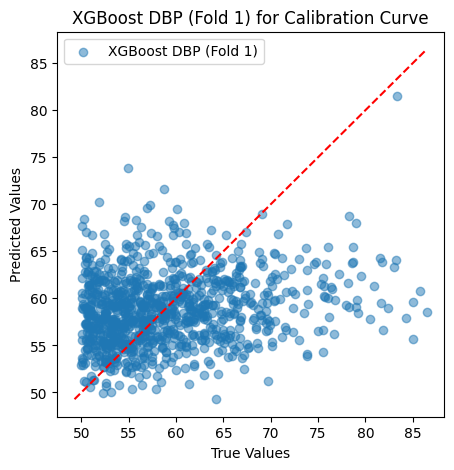

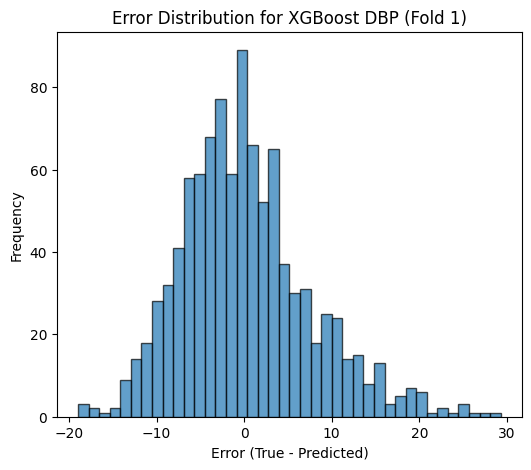

                  Model       R^2        MSE      RMSE       MAE
0  XGBoost DBP (Fold 2)  0.026116  55.873302  7.474844  5.669168
                  Model      R^2        MSE      RMSE       MAE
0  XGBoost DBP (Fold 3) -0.04866  55.005486  7.416568  5.770827
                  Model       R^2        MSE      RMSE       MAE
0  XGBoost DBP (Fold 4)  0.013927  57.117859  7.557636  5.611466
                  Model       R^2        MSE      RMSE       MAE
0  XGBoost DBP (Fold 5) -0.018376  55.581562  7.455304  5.722416

XGBoost DBP Mean ± Std over 5 folds:
R^2: -0.0185 ± 0.0350
MSE: 55.7220 ± 0.7721
RMSE: 7.4645 ± 0.0516
MAE: 5.6949 ± 0.0532

XGBoost DBP BHS Evaluation (Mean over 5 folds):
Grade: B
Percent within 5 mmHg: 5.343e+01%
Percent within 10 mmHg: 8.461e+01%
Percent within 15 mmHg: 9.507e+01%

XGBoost DBP AAMI Evaluation (Mean over 5 folds):
Mean Error (mmHg): -5.996e-02
Standard Deviation (mmHg): 7.46
Pass/Fail: Pass


In [13]:
from xgboost import XGBRegressor

if MODELS_TO_TEST["XGBRegressor"]:
    # DBP
    cross_val_regression(XGBRegressor, X.values, dbp.values, label="XGBoost DBP", model_kwargs={'random_state':42})

                  Model       R^2        MSE       RMSE        MAE
0  XGBoost SBP (Fold 1)  0.203076  289.33197  17.009762  13.195866


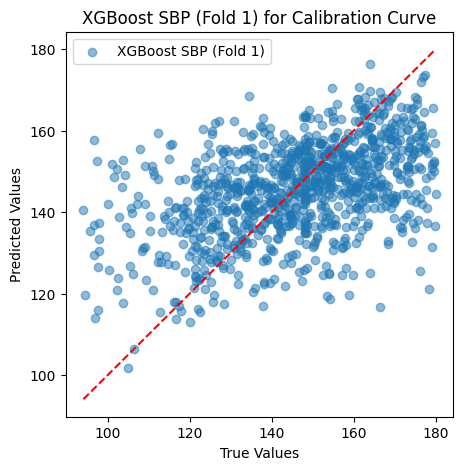

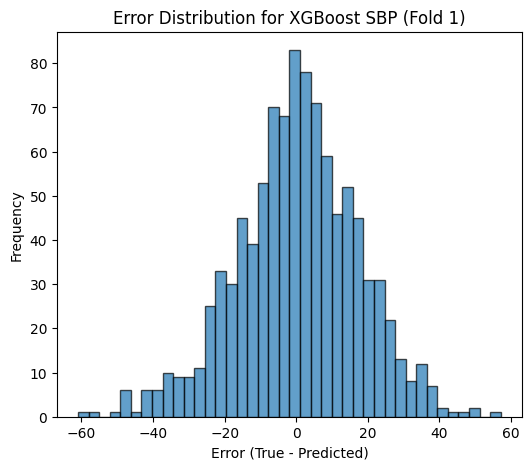

                  Model       R^2         MSE       RMSE      MAE
0  XGBoost SBP (Fold 2)  0.235793  272.799622  16.516647  12.7665
                  Model       R^2         MSE       RMSE       MAE
0  XGBoost SBP (Fold 3)  0.216857  296.990662  17.233418  13.39458
                  Model       R^2         MSE       RMSE       MAE
0  XGBoost SBP (Fold 4)  0.211399  283.261963  16.830389  12.77261
                  Model       R^2         MSE       RMSE        MAE
0  XGBoost SBP (Fold 5)  0.207482  288.707092  16.991383  12.950558

XGBoost SBP Mean ± Std over 5 folds:
R^2: 0.2149 ± 0.0114
MSE: 286.2183 ± 8.0092
RMSE: 16.9163 ± 0.2375
MAE: 13.0160 ± 0.2455

XGBoost SBP BHS Evaluation (Mean over 5 folds):
Grade: D
Percent within 5 mmHg: 2.777e+01%
Percent within 10 mmHg: 4.861e+01%
Percent within 15 mmHg: 6.532e+01%

XGBoost SBP AAMI Evaluation (Mean over 5 folds):
Mean Error (mmHg): -3.142e-02
Standard Deviation (mmHg): 16.91
Pass/Fail: Fail


In [14]:
if MODELS_TO_TEST["XGBRegressor"]:
    # SBP
    cross_val_regression(XGBRegressor, X.values, sbp.values, label="XGBoost SBP", model_kwargs={'random_state':42})

## Support Vector Machine

              Model       R^2       MSE      RMSE       MAE
0  SVM DBP (Fold 1) -0.072836  55.42219  7.444608  5.477465


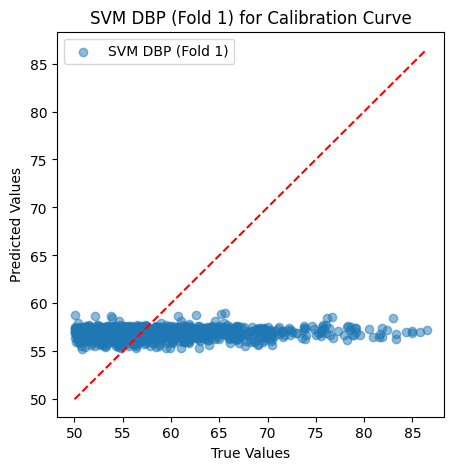

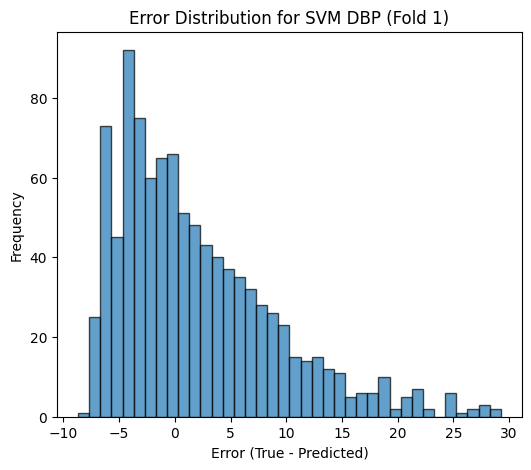

              Model       R^2        MSE      RMSE       MAE
0  SVM DBP (Fold 2) -0.076454  61.757892  7.858619  5.811314
              Model       R^2       MSE      RMSE      MAE
0  SVM DBP (Fold 3) -0.040679  54.58685  7.388291  5.45296
              Model       R^2        MSE      RMSE       MAE
0  SVM DBP (Fold 4) -0.043835  60.463664  7.775838  5.550112
              Model      R^2       MSE      RMSE     MAE
0  SVM DBP (Fold 5) -0.04362  56.95934  7.547141  5.5691

SVM DBP Mean ± Std over 5 folds:
R^2: -0.0555 ± 0.0157
MSE: 57.8380 ± 2.8085
RMSE: 7.6029 ± 0.1841
MAE: 5.5722 ± 0.1272

SVM DBP BHS Evaluation (Mean over 5 folds):
Grade: B
Percent within 5 mmHg: 5.674e+01%
Percent within 10 mmHg: 8.663e+01%
Percent within 15 mmHg: 9.347e+01%

SVM DBP AAMI Evaluation (Mean over 5 folds):
Mean Error (mmHg): 1.791e+00
Standard Deviation (mmHg): 7.39
Pass/Fail: Pass


In [15]:
from sklearn.svm import SVR

if MODELS_TO_TEST["SupportVectorRegressor"]:
    # DBP
    cross_val_regression(SVR, X.values, dbp.values, label="SVM DBP", model_kwargs={'kernel':'rbf'})

              Model       R^2         MSE       RMSE        MAE
0  SVM SBP (Fold 1) -0.004534  364.707132  19.097307  15.527244


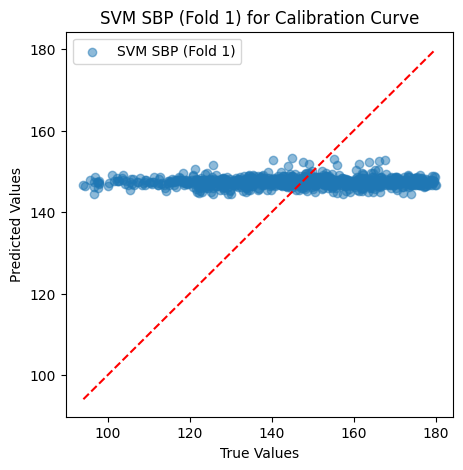

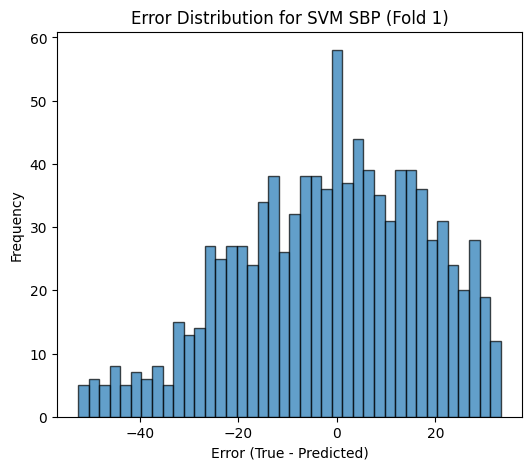

              Model      R^2         MSE       RMSE        MAE
0  SVM SBP (Fold 2)  0.00428  355.443245  18.853203  15.406556
              Model       R^2         MSE       RMSE        MAE
0  SVM SBP (Fold 3) -0.019632  386.674106  19.664031  15.724684
              Model       R^2         MSE       RMSE        MAE
0  SVM SBP (Fold 4) -0.015105  364.621486  19.095064  15.422282
              Model       R^2         MSE       RMSE        MAE
0  SVM SBP (Fold 5) -0.020997  371.939736  19.285739  15.590892

SVM SBP Mean ± Std over 5 folds:
R^2: -0.0112 ± 0.0097
MSE: 368.6771 ± 10.4104
RMSE: 19.1991 ± 0.2700
MAE: 15.5343 ± 0.1169

SVM SBP BHS Evaluation (Mean over 5 folds):
Grade: D
Percent within 5 mmHg: 2.032e+01%
Percent within 10 mmHg: 3.765e+01%
Percent within 15 mmHg: 5.319e+01%

SVM SBP AAMI Evaluation (Mean over 5 folds):
Mean Error (mmHg): -2.087e+00
Standard Deviation (mmHg): 19.08
Pass/Fail: Fail


In [16]:
if MODELS_TO_TEST["SupportVectorRegressor"]:
    # SBP
    cross_val_regression(SVR, X.values, sbp.values, label="SVM SBP", model_kwargs={'kernel':'rbf'})

## CatBoost

                   Model       R^2        MSE      RMSE       MAE
0  CatBoost DBP (Fold 1)  0.060588  48.529538  6.966315  5.355543


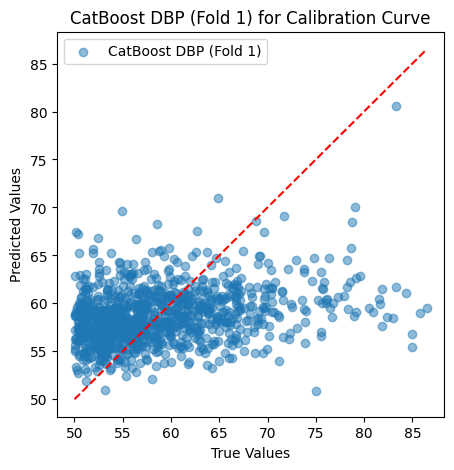

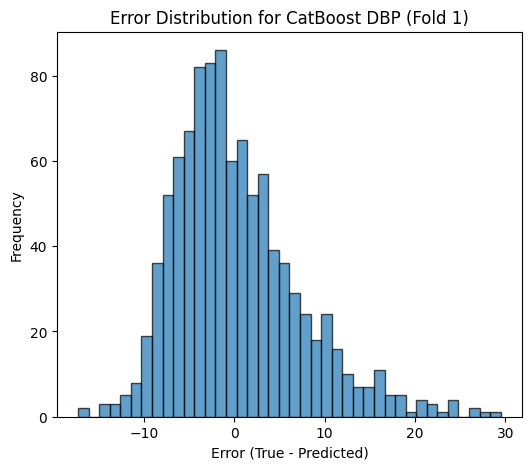

                   Model       R^2        MSE      RMSE       MAE
0  CatBoost DBP (Fold 2)  0.117942  50.605119  7.113728  5.476927
                   Model       R^2        MSE      RMSE       MAE
0  CatBoost DBP (Fold 3)  0.072604  48.644827  6.974584  5.464451
                   Model       R^2        MSE      RMSE       MAE
0  CatBoost DBP (Fold 4)  0.119778  50.986476  7.140481  5.306914
                   Model      R^2        MSE      RMSE       MAE
0  CatBoost DBP (Fold 5)  0.10016  49.112032  7.007998  5.446058

CatBoost DBP Mean ± Std over 5 folds:
R^2: 0.0942 ± 0.0239
MSE: 49.5756 ± 1.0223
RMSE: 7.0406 ± 0.0725
MAE: 5.4100 ± 0.0668

CatBoost DBP BHS Evaluation (Mean over 5 folds):
Grade: B
Percent within 5 mmHg: 5.541e+01%
Percent within 10 mmHg: 8.805e+01%
Percent within 15 mmHg: 9.573e+01%

CatBoost DBP AAMI Evaluation (Mean over 5 folds):
Mean Error (mmHg): -2.019e-02
Standard Deviation (mmHg): 7.04
Pass/Fail: Pass


In [17]:
from catboost import CatBoostRegressor

if MODELS_TO_TEST["CatBoostRegressor"]:
    # DBP
    cross_val_regression(CatBoostRegressor, X.values, dbp.values, label="CatBoost DBP", model_kwargs={'random_state':42, 'verbose':0})

                   Model       R^2        MSE       RMSE        MAE
0  CatBoost SBP (Fold 1)  0.288118  258.45668  16.076588  12.559552


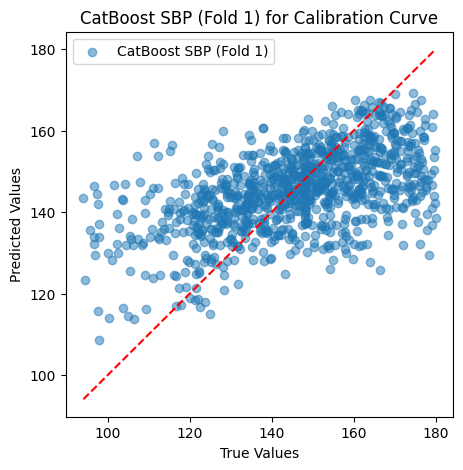

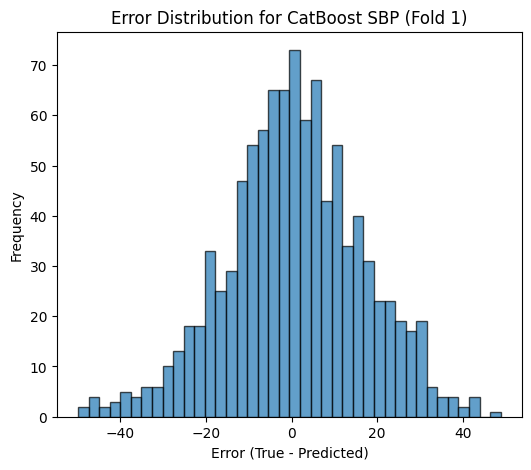

                   Model       R^2        MSE       RMSE        MAE
0  CatBoost SBP (Fold 2)  0.327141  240.19113  15.498101  12.068341
                   Model       R^2         MSE       RMSE        MAE
0  CatBoost SBP (Fold 3)  0.308146  262.371151  16.197875  12.688636
                   Model       R^2         MSE       RMSE        MAE
0  CatBoost SBP (Fold 4)  0.299933  251.461035  15.857523  12.287592
                   Model       R^2         MSE       RMSE        MAE
0  CatBoost SBP (Fold 5)  0.286158  260.046139  16.125946  12.506236

CatBoost SBP Mean ± Std over 5 folds:
R^2: 0.3019 ± 0.0150
MSE: 254.5052 ± 8.0293
RMSE: 15.9512 ± 0.2534
MAE: 12.4221 ± 0.2192

CatBoost SBP BHS Evaluation (Mean over 5 folds):
Grade: D
Percent within 5 mmHg: 2.712e+01%
Percent within 10 mmHg: 5.033e+01%
Percent within 15 mmHg: 6.700e+01%

CatBoost SBP AAMI Evaluation (Mean over 5 folds):
Mean Error (mmHg): 1.612e-02
Standard Deviation (mmHg): 15.95
Pass/Fail: Fail


In [18]:
if MODELS_TO_TEST["CatBoostRegressor"]:
    # SBP
    cross_val_regression(CatBoostRegressor, X.values, sbp.values, label="CatBoost SBP", model_kwargs={'random_state':42, 'verbose':0})

## Multilayer Perceptron Regressor

In [19]:
MLP_HIDDEN_LAYER_SIZES = (64, 64, 32, 16)
MLP_MAX_ITER = 400

              Model       R^2       MSE      RMSE       MAE
0  MLP DBP (Fold 1) -0.036836  53.56245  7.318637  5.772525


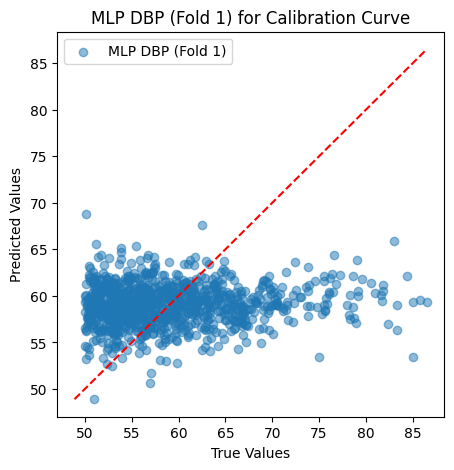

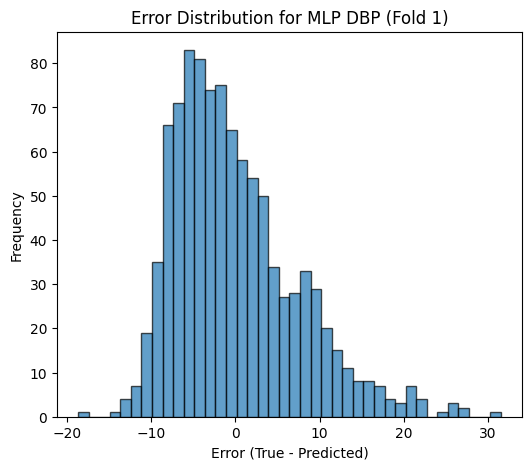

              Model       R^2        MSE      RMSE       MAE
0  MLP DBP (Fold 2) -0.090636  62.571552  7.910218  5.984768
              Model       R^2        MSE      RMSE       MAE
0  MLP DBP (Fold 3) -0.147822  60.206879  7.759309  5.676325
              Model       R^2        MSE      RMSE       MAE
0  MLP DBP (Fold 4) -0.157124  67.025871  8.186933  6.657641
              Model       R^2        MSE      RMSE       MAE
0  MLP DBP (Fold 5) -0.096438  59.842079  7.735766  5.858596

MLP DBP Mean ± Std over 5 folds:
R^2: -0.1058 ± 0.0435
MSE: 60.6418 ± 4.3687
RMSE: 7.7822 ± 0.2821
MAE: 5.9900 ± 0.3489

MLP DBP BHS Evaluation (Mean over 5 folds):
Grade: B
Percent within 5 mmHg: 5.011e+01%
Percent within 10 mmHg: 8.447e+01%
Percent within 15 mmHg: 9.458e+01%

MLP DBP AAMI Evaluation (Mean over 5 folds):
Mean Error (mmHg): 1.508e-01
Standard Deviation (mmHg): 7.65
Pass/Fail: Pass


In [20]:
from sklearn.neural_network import MLPRegressor

if MODELS_TO_TEST["MultilayerPerceptronRegressor"]:
    # DBP
    cross_val_regression(MLPRegressor, X.values, dbp.values, label="MLP DBP", model_kwargs={'hidden_layer_sizes':MLP_HIDDEN_LAYER_SIZES, 'max_iter':MLP_MAX_ITER, 'random_state':42})

              Model       R^2         MSE       RMSE        MAE
0  MLP SBP (Fold 1)  0.016203  357.178223  18.899158  15.331247


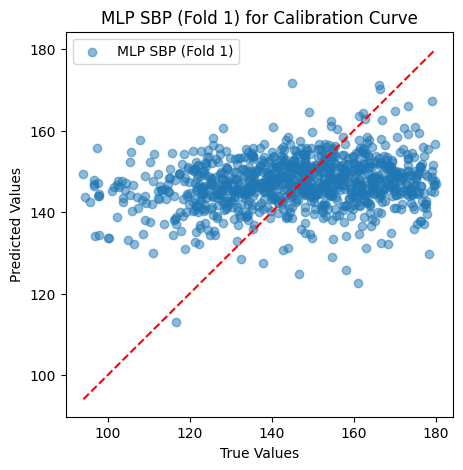

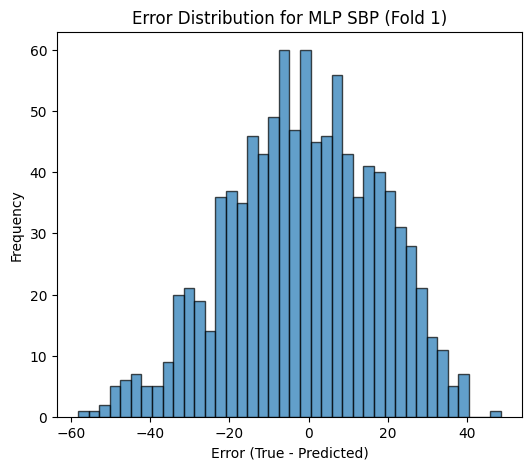

              Model       R^2         MSE       RMSE        MAE
0  MLP SBP (Fold 2) -0.067033  380.899841  19.516655  15.651852
              Model       R^2         MSE       RMSE        MAE
0  MLP SBP (Fold 3) -0.067047  404.655182  20.116043  15.954792
              Model       R^2        MSE       RMSE        MAE
0  MLP SBP (Fold 4)  0.019777  352.09198  18.764114  15.053657
              Model       R^2        MSE       RMSE        MAE
0  MLP SBP (Fold 5) -0.055668  384.57019  19.610462  15.889148

MLP SBP Mean ± Std over 5 folds:
R^2: -0.0308 ± 0.0400
MSE: 375.8791 ± 19.2060
RMSE: 19.3813 ± 0.4948
MAE: 15.5761 ± 0.3406

MLP SBP BHS Evaluation (Mean over 5 folds):
Grade: D
Percent within 5 mmHg: 1.990e+01%
Percent within 10 mmHg: 3.832e+01%
Percent within 15 mmHg: 5.480e+01%

MLP SBP AAMI Evaluation (Mean over 5 folds):
Mean Error (mmHg): -6.296e-01
Standard Deviation (mmHg): 19.22
Pass/Fail: Fail


In [21]:
if MODELS_TO_TEST["MultilayerPerceptronRegressor"]:
    # SBP
    cross_val_regression(MLPRegressor, X.values, sbp.values, label="MLP SBP", model_kwargs={'hidden_layer_sizes':MLP_HIDDEN_LAYER_SIZES, 'max_iter':MLP_MAX_ITER, 'random_state':42})

### Multilayer Perceptron w/ Scaled X and Y

                             Model       R^2        MSE      RMSE       MAE
0  MLP DBP (Scaled X & Y) (Fold 1) -0.857815  95.973808  9.796622  7.243148


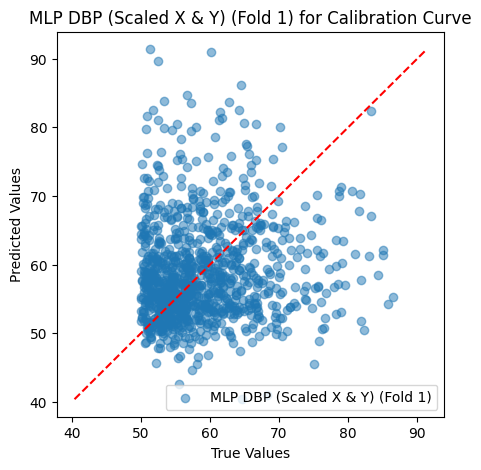

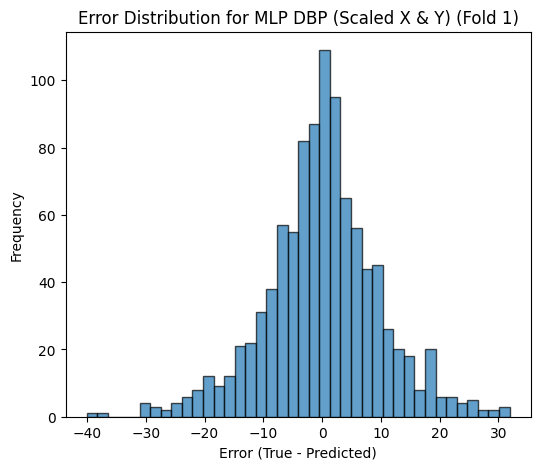

                             Model       R^2         MSE       RMSE       MAE
0  MLP DBP (Scaled X & Y) (Fold 2) -0.836076  105.338661  10.263462  7.675099
                             Model       R^2        MSE      RMSE       MAE
0  MLP DBP (Scaled X & Y) (Fold 3) -0.793915  94.096481  9.700335  7.243252
                             Model       R^2        MSE      RMSE       MAE
0  MLP DBP (Scaled X & Y) (Fold 4) -0.579349  91.483093  9.564679  7.267997
                             Model       R^2        MSE      RMSE       MAE
0  MLP DBP (Scaled X & Y) (Fold 5) -0.734905  94.688782  9.730816  7.286343

MLP DBP (Scaled X & Y) Mean ± Std over 5 folds:
R^2: -0.7604 ± 0.0998
MSE: 96.3162 ± 4.7425
RMSE: 9.8112 ± 0.2384
MAE: 7.3432 ± 0.1668

MLP DBP (Scaled X & Y) BHS Evaluation (Mean over 5 folds):
Grade: C
Percent within 5 mmHg: 4.605e+01%
Percent within 10 mmHg: 7.337e+01%
Percent within 15 mmHg: 8.760e+01%

MLP DBP (Scaled X & Y) AAMI Evaluation (Mean over 5 folds):
Mean Error (mmHg):

In [22]:
if MODELS_TO_TEST["MultilayerPerceptronScaledRegressor"]:
    # DBP
    cross_val_regression(
        MLPRegressor, X_scaled, dbp.values, label="MLP DBP (Scaled X & Y)",
        model_kwargs={'hidden_layer_sizes':MLP_HIDDEN_LAYER_SIZES, 'max_iter':MLP_MAX_ITER, 'random_state':42},
        scale_X=False, scale_y=True, y_scaler=dbp_scaler
    )

                             Model       R^2         MSE       RMSE       MAE
0  MLP SBP (Scaled X & Y) (Fold 1) -0.423952  516.981384  22.737225  17.25544


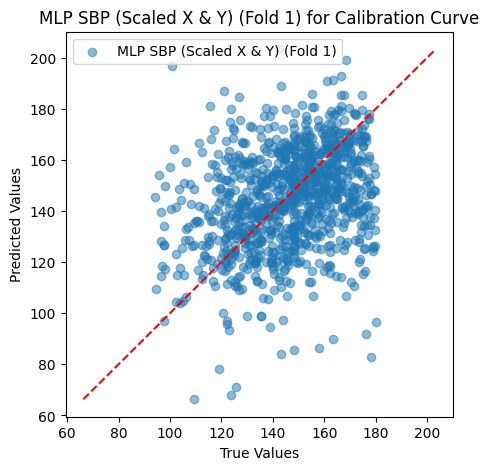

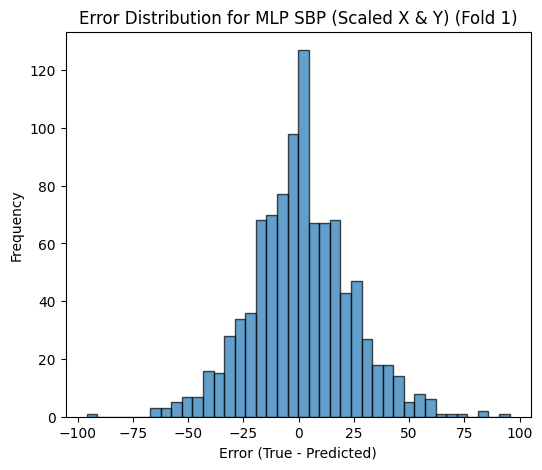

                             Model       R^2         MSE       RMSE        MAE
0  MLP SBP (Scaled X & Y) (Fold 2) -0.533301  547.344177  23.395388  18.019457
                             Model       R^2         MSE       RMSE        MAE
0  MLP SBP (Scaled X & Y) (Fold 3) -0.411275  535.196411  23.134312  17.725693
                             Model       R^2         MSE       RMSE        MAE
0  MLP SBP (Scaled X & Y) (Fold 4) -0.484492  533.223267  23.091627  17.698111
                             Model       R^2         MSE     RMSE        MAE
0  MLP SBP (Scaled X & Y) (Fold 5) -0.599085  582.531982  24.1357  18.103266

MLP SBP (Scaled X & Y) Mean ± Std over 5 folds:
R^2: -0.4904 ± 0.0698
MSE: 543.0554 ± 21.9776
RMSE: 23.2989 ± 0.4680
MAE: 17.7604 ± 0.2982

MLP SBP (Scaled X & Y) BHS Evaluation (Mean over 5 folds):
Grade: D
Percent within 5 mmHg: 2.166e+01%
Percent within 10 mmHg: 3.776e+01%
Percent within 15 mmHg: 5.266e+01%

MLP SBP (Scaled X & Y) AAMI Evaluation (Mean over 5 folds)

In [23]:
if MODELS_TO_TEST["MultilayerPerceptronScaledRegressor"]:
    # SBP
    cross_val_regression(
        MLPRegressor, X_scaled, sbp.values, label="MLP SBP (Scaled X & Y)",
        model_kwargs={'hidden_layer_sizes':MLP_HIDDEN_LAYER_SIZES, 'max_iter':MLP_MAX_ITER, 'random_state':42},
        scale_X=False, scale_y=True, y_scaler=sbp_scaler
    )

# Causal Analysis

## Direct LINGAM

c:\Users\aniru\AppData\Local\Programs\Python\Python310\lib\site-packages\lingam\direct_lingam.py:224: RuntimeWarning: invalid value encountered in divide
  xj_std = (X[:, j] - np.mean(X[:, j])) / np.std(X[:, j])
c:\Users\aniru\AppData\Local\Programs\Python\Python310\lib\site-packages\lingam\direct_lingam.py:223: RuntimeWarning: invalid value encountered in divide
  xi_std = (X[:, i] - np.mean(X[:, i])) / np.std(X[:, i])
c:\Users\aniru\AppData\Local\Programs\Python\Python310\lib\site-packages\lingam\direct_lingam.py:163: RuntimeWarning: invalid value encountered in divide
  return (self._entropy(xj_std) + self._entropy(ri_j / np.std(ri_j))) - (
c:\Users\aniru\AppData\Local\Programs\Python\Python310\lib\site-packages\lingam\direct_lingam.py:164: RuntimeWarning: invalid value encountered in divide
  self._entropy(xi_std) + self._entropy(rj_i / np.std(rj_i))
c:\Users\aniru\AppData\Local\Programs\Python\Python310\lib\site-packages\lingam\direct_lingam.py:151: RuntimeWarning: invalid value e

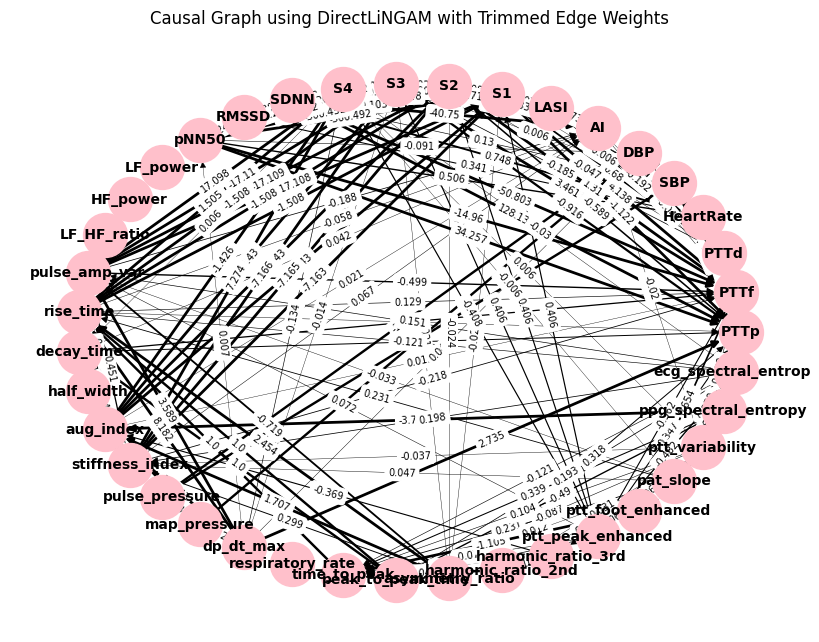

In [24]:
from lingam import DirectLiNGAM
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

EDGE_THRESHOLD = 0.005

# Fit the DirectLiNGAM model
model = DirectLiNGAM()
model.fit(dataset_df)

# Get the adjacency matrix
adjacency_matrix = model.adjacency_matrix_

# Create a directed graph using NetworkX
causal_graph = nx.DiGraph(adjacency_matrix)

# Relabel nodes with feature names
causal_graph = nx.relabel_nodes(causal_graph, {i: col for i, col in enumerate(dataset_df.columns)})

# Remove edges with weights less than 0.005
edges_to_remove = [(u, v) for u, v, d in causal_graph.edges(data=True) if abs(d['weight']) < EDGE_THRESHOLD]
causal_graph.remove_edges_from(edges_to_remove)

# Draw the graph
plt.figure(figsize=(8, 6))
pos = nx.circular_layout(causal_graph)
edge_weights = [min(abs(weight) * 1.5 + 0.25, 2) for weight in nx.get_edge_attributes(causal_graph, 'weight').values()]
nx.draw(
    causal_graph, pos, with_labels=True, node_size=1000, node_color="pink",
    font_size=10, font_weight="bold", edge_color="black", width=edge_weights
)

# Add edge weights as labels
edge_labels = {edge: round(weight, 3) for edge, weight in nx.get_edge_attributes(causal_graph, 'weight').items()}
nx.draw_networkx_edge_labels(causal_graph, pos, edge_labels=edge_labels, font_size=7, )

plt.title("Causal Graph using DirectLiNGAM with Trimmed Edge Weights")
plt.savefig('figures/causal_graph_direct_lingam.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

## CATE Estimation

In [ ]:
from econml.dml import CausalForestDML

# Initialize the CausalForestDML model
causal_forest_sbp = CausalForestDML(
    model_t=RandomForestRegressor(n_estimators=100, random_state=42),
    model_y=RandomForestRegressor(n_estimators=100, random_state=42),
    discrete_treatment=False,
    random_state=42
)

# Fit the model
causal_forest_sbp.fit(Y=sbp.values, T=X.values, X=X.values, W=None)

# Estimate treatment effects
treatment_effects_sbp = causal_forest_sbp.const_marginal_effect(X=X.values)

       PTTp       PTTf      PTTd  HeartRate        AI      LASI          S1  \
0  7.408752 -11.380931  0.084142    0.04668 -6.998688 -1.638565 -261.851855   

           S2          S3          S4  ...  peak_to_peak_time  \
0 -260.852067 -261.806796  260.470571  ...      109341.054003   

   asymmetry_ratio  harmonic_ratio_2nd  harmonic_ratio_3rd  ptt_peak_enhanced  \
0         0.496788           -5.360202          -18.785525           -1.94729   

   ptt_foot_enhanced  pat_slope  ptt_variability  ppg_spectral_entropy  \
0          11.548452 -10.837963         9.679629             -0.305296   

   ecg_spectral_entropy  
0               1.03498  

[1 rows x 34 columns]


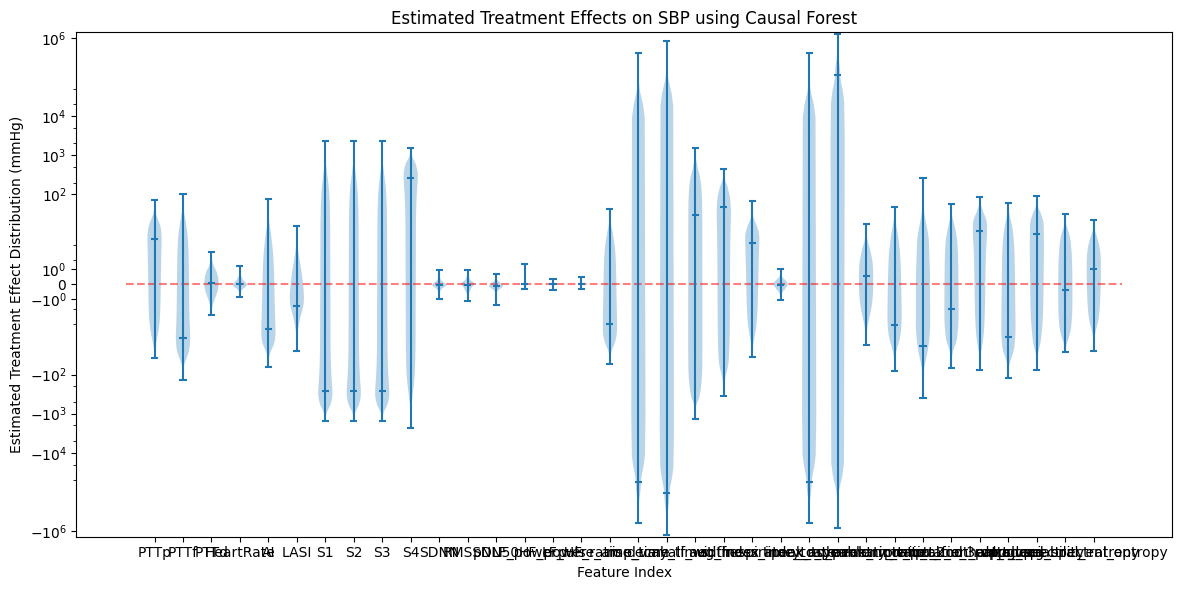

In [26]:
treatment_effects_sbp_df = pd.DataFrame({
    feature: np.mean(treatment_effects_sbp[:, i]) for i, feature in enumerate(X.columns)    
}, index=[0])

print(treatment_effects_sbp_df)

# Plotting the treatment effects as violin plots
plt.figure(figsize=(12, 6))
plt.hlines(y=0, xmin=0, xmax=len(X.columns) + 1, color='red', linestyle='--', label='Zero Effect', alpha=0.5)
plt.violinplot([treatment_effects_sbp[:, i] for i in range(treatment_effects_sbp.shape[1])], showmeans=True)
plt.xticks(ticks=range(1, len(X.columns) + 1), labels=X.columns, ha='center')
plt.xlabel('Feature Index')
plt.ylabel('Estimated Treatment Effect Distribution (mmHg)')
plt.yscale('asinh')
plt.title('Estimated Treatment Effects on SBP using Causal Forest')
plt.tight_layout()
plt.show()
plt.close()

In [27]:
# Initialize the CausalForestDML model
causal_forest_dbp = CausalForestDML(
    model_t=RandomForestRegressor(n_estimators=100, random_state=42),
    model_y=RandomForestRegressor(n_estimators=100, random_state=42),
    discrete_treatment=False,
    random_state=42
)

# Fit the model
causal_forest_dbp.fit(Y=dbp.values, T=X.values, X=X.values, W=None)

# Estimate treatment effects
treatment_effects_dbp = causal_forest_dbp.const_marginal_effect(X=X.values)

KeyboardInterrupt: 

In [ ]:
treatment_effects_dbp_df = pd.DataFrame({
    feature: np.mean(treatment_effects_dbp[:, i]) for i, feature in enumerate(X.columns)    
}, index=[0])

print(treatment_effects_dbp_df)

# Plotting the treatment effects as violin plots
plt.figure(figsize=(12, 6))
plt.hlines(y=0, xmin=0, xmax=len(X.columns) + 1, color='red', linestyle='--', label='Zero Effect', alpha=0.5)
plt.violinplot([treatment_effects_dbp[:, i] for i in range(treatment_effects_dbp.shape[1])], showmeans=True)
plt.xticks(ticks=range(1, len(X.columns) + 1), labels=X.columns, ha='center')
plt.xlabel('Feature Index')
plt.ylabel('Estimated Treatment Effect Distribution (mmHg)')
plt.yscale('asinh')
plt.title('Estimated Treatment Effects on DBP using Causal Forest')
plt.tight_layout()
plt.show()
plt.close()

## Causally "Regularized" Models

In [ ]:
import torch
from sklearn.base import BaseEstimator, RegressorMixin

import torch.nn as nn
import torch.optim as optim

class CausallyRegularizedNN(BaseEstimator, RegressorMixin):
    def __init__(self, input_dim, hidden_layer_sizes=(64, 64, 32, 16), learning_rate=0.001, 
                 max_iter=500, causal_regularization_weight=1, random_state=42):
        self.input_dim = input_dim
        self.hidden_layer_sizes = hidden_layer_sizes
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.causal_regularization_weight = causal_regularization_weight
        self.random_state = random_state
        
    def _build_network(self):
        layers = []
        prev_size = self.input_dim
        
        for hidden_size in self.hidden_layer_sizes:
            layers.append(nn.Linear(prev_size, hidden_size))
            layers.append(nn.ReLU())
            prev_size = hidden_size
        
        layers.append(nn.Linear(prev_size, 1))
        
        return nn.Sequential(*layers)
    
    def fit(self, X, y):
        torch.manual_seed(self.random_state)
        
        self.model = self._build_network()
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)
        self.criterion = nn.MSELoss()
        
        X_tensor = torch.FloatTensor(X)
        y_tensor = torch.FloatTensor(y).reshape(-1, 1)
        
        # Early stopping variables
        best_loss = float('inf')
        patience = 10
        patience_counter = 0
        
        for epoch in range(self.max_iter):
            self.optimizer.zero_grad()
            
            # Forward pass
            outputs = self.model(X_tensor)
            
            # Standard MSE loss
            mse_loss = self.criterion(outputs, y_tensor)
            
            # Causal regularization: penalize large weights in early layers
            causal_penalty = 0
            for i, layer in enumerate(self.model):
                if isinstance(layer, nn.Linear):
                    # Higher penalty for earlier layers (closer to input)
                    layer_weight = (len(self.hidden_layer_sizes) - i) / len(self.hidden_layer_sizes)
                    causal_penalty += layer_weight * torch.norm(layer.weight, p=1)
            
            # Total loss
            total_loss = mse_loss + self.causal_regularization_weight * abs(causal_penalty)
            print(f'Epoch {epoch+1}/{self.max_iter}, Loss: {total_loss.item():.4f} (MSE: {mse_loss.item():.4f}, Causal Penalty: {abs(causal_penalty.item()):.4f})')
            
            # Early stopping check
            if total_loss.item() < best_loss:
                best_loss = total_loss.item()
                patience_counter = 0
            else:
                patience_counter += 1
                if patience_counter >= patience:
                    print(f'Early stopping at epoch {epoch+1}')
                    break
            
            total_loss.backward()
            self.optimizer.step()
            
        return self
    def predict(self, X):
        self.model.eval()
        with torch.no_grad():
            X_tensor = torch.FloatTensor(X)
            predictions = self.model(X_tensor)
        return predictions.numpy().flatten()

def train_and_evaluate_causal_model(model_cls, X_train, X_test, y_train, y_test, model_kwargs=None, scale_y=False, y_scaler=None):
    # Add input dimension to model kwargs
    if model_kwargs is None:
        model_kwargs = {}
    model_kwargs['input_dim'] = X_train.shape[1]
    
    model = model_cls(**model_kwargs)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    if scale_y and y_scaler is not None:
        # Inverse transform predictions for reporting
        y_pred = y_scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
        y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    
    return y_test, y_pred

In [ ]:
# DBP with Causally Regularized Neural Network
cross_val_regression(
    CausallyRegularizedNN, X_scaled, dbp.values, 
    label="Causally Regularized NN DBP",
    model_kwargs={
        'input_dim': X_scaled.shape[1],
        'hidden_layer_sizes': MLP_HIDDEN_LAYER_SIZES,
        'max_iter': MLP_MAX_ITER,
        'causal_regularization_weight': 1,
        'random_state': 42
    },
    scale_X=False, scale_y=True, y_scaler=dbp_scaler
)

In [ ]:
# SBP with Causally Regularized Neural Network
cross_val_regression(
    CausallyRegularizedNN, X_scaled, sbp.values, 
    label="Causally Regularized NN SBP",
    model_kwargs={
        'input_dim': X_scaled.shape[1],
        'hidden_layer_sizes': MLP_HIDDEN_LAYER_SIZES,
        'max_iter': MLP_MAX_ITER,
        'causal_regularization_weight': 1,
        'random_state': 42
    },
    scale_X=False, scale_y=True, y_scaler=sbp_scaler
)

## Causal Feature Ablation Test

In [ ]:
import seaborn as sns

def get_significant_features(treatment_effects_df, threshold):
    return [col for col in treatment_effects_df.columns if abs(treatment_effects_df[col].iloc[0]) >= threshold]

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel, wilcoxon

def run_ablation_test(treatment_effects_df, target_values, target_name, thresholds=[0.1, 1.0, 10.0]):
    results = []
    mae_storage = {}  # store MAE per (model, threshold)

    for threshold in thresholds:
        significant_features = get_significant_features(treatment_effects_df, threshold)
        if not significant_features:
            print(f"\nThreshold {threshold}: No significant features found")
            continue
        X_subset = X[significant_features].values

        for model_name, model_cls, model_kwargs in [
            ("XGBoost", XGBRegressor, {'random_state':42}),
            ("SVM", SVR, {'kernel':'rbf'}),
            ("CatBoost", CatBoostRegressor, {'random_state':42, 'verbose':0})
        ]:
            print(f"\n--- {model_name} {target_name} (Threshold {threshold}) ---")
            mae_values = []

            def eval_regression_patch(y_true, y_pred, label="Model", plot=True):
                from sklearn.metrics import mean_absolute_error
                mae = mean_absolute_error(y_true, y_pred)
                return 0, 0, 0, mae

            import types
            global evaluate_regression
            orig_evaluate_regression = evaluate_regression
            evaluate_regression = eval_regression_patch

            global print_cross_val_results
            orig_print_cross_val_results = print_cross_val_results
            def dummy_print_cross_val_results(label, metrics, bhs_results, aami_results):
                pass
            print_cross_val_results = dummy_print_cross_val_results

            for fold, (train_idx, test_idx) in enumerate(kf.split(X_subset)):
                X_train = X_subset[train_idx]
                X_test = X_subset[test_idx]
                y_train = target_values[train_idx]
                y_test = target_values[test_idx]
                model = model_cls(**model_kwargs)
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                _, _, _, mae = eval_regression_patch(y_test, y_pred)
                mae_values.append(mae)

            evaluate_regression = orig_evaluate_regression
            print_cross_val_results = orig_print_cross_val_results

            mae_storage[(model_name, threshold)] = mae_values
            for mae in mae_values:
                results.append({
                    'Model': model_name,
                    'Threshold': threshold,
                    'MAE': mae
                })

    results_df = pd.DataFrame(results)
    print("\n=== Ablation Test Results ===")
    print(results_df.groupby(['Model', 'Threshold'])['MAE'].mean())

    plt.figure(figsize=(10,6))
    sns.barplot(data=results_df, x='Model', y='MAE', hue='Threshold')
    plt.title(f"Mean MAE per Model per Threshold ({target_name})")
    plt.show()

    for model_name in results_df['Model'].unique():
        plt.figure(figsize=(8,5))
        sns.boxplot(data=results_df[results_df['Model'] == model_name], x='Threshold', y='MAE')
        plt.title(f"{model_name} - Box Plot of MAE Across Thresholds")
        plt.show()

    # Statistical testing
    print("\n=== Statistical Significance Testing (Paired t-tests & Wilcoxon) ===")
    thresholds_sorted = sorted(set(thresholds))
    for model_name in results_df['Model'].unique():
        print(f"\n>> {model_name}")
        for i in range(len(thresholds_sorted)):
            for j in range(i + 1, len(thresholds_sorted)):
                t1 = thresholds_sorted[i]
                t2 = thresholds_sorted[j]
                key1 = (model_name, t1)
                key2 = (model_name, t2)
                if key1 not in mae_storage or key2 not in mae_storage:
                    continue
                mae1 = mae_storage[key1]
                mae2 = mae_storage[key2]
                if len(mae1) != len(mae2):
                    print(f"Warning: unequal folds between {t1} and {t2}, skipping test.")
                    continue

                # Paired t-test
                t_stat, p_ttest = ttest_rel(mae1, mae2)
                # Wilcoxon signed-rank test
                try:
                    w_stat, p_wilcoxon = wilcoxon(mae1, mae2)
                except ValueError:
                    p_wilcoxon = np.nan  # Wilcoxon fails if no differences

                print(f"Threshold {t1} vs {t2}:")
                print(f"  t-test p-value: {p_ttest:.4f} {'** significant **' if p_ttest < 0.05 else ''}")
                print(f"  Wilcoxon p-value: {p_wilcoxon:.4f} {'** significant **' if p_wilcoxon < 0.05 else ''}")



In [ ]:
run_ablation_test(treatment_effects_sbp_df, sbp.values, "SBP")

In [ ]:
run_ablation_test(treatment_effects_dbp_df, dbp.values, "DBP")